In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree

%matplotlib inline

### 6. Classification of Spam: Trees

In [137]:
spam_df = pd.read_csv("spam.csv")

In [138]:
columns = ['day of week', 'time of day', 'size.kb', 'box',
       'local', 'digits', 'name', 'special', 'credit', 'sucker',
       'porn', 'chain', 'username', 'large text',
       'spam']

In [139]:
spam_df = spam_df[columns]

In [140]:
spam_df

,day of week,time of day,size.kb,box,local,digits,name,special,credit,sucker,porn,chain,username,large text,spam
0,Thu,0,7,no,no,0,name,1,no,no,no,no,no,no,no
1,Thu,0,2,no,no,0,name,5,no,no,no,no,no,no,yes
2,Thu,14,3,no,yes,0,name,2,no,no,no,yes,no,no,no
3,Thu,3,3,yes,no,0,name,0,no,no,no,no,no,no,no
4,Thu,3,4,no,no,0,name,2,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,Fri,10,5,no,no,0,single,1,no,no,no,no,no,no,no
2167,Sun,15,192,yes,no,0,name,0,no,no,no,no,no,no,no
2168,Sun,15,85,yes,no,0,name,0,no,no,no,no,no,no,no
2169,Tue,13,4,yes,no,0,name,0,no,no,no,no,no,no,no


In [200]:
spam_params = spam_df[['day of week', 'time of day', 'size.kb', 'box',
       'local', 'digits', 'name', 'special', 'credit', 'sucker',
       'porn', 'chain', 'username', 'large text']]
target = spam_df['spam']

**I)**

In [142]:
f_spam = (spam_df.loc[spam_df['spam'] == 'yes'].shape[0]/spam_df.shape[0])*100

print("Fraction of the e-mails are actually spam: %.3f" %f_spam)

Fraction of the e-mails are actually spam: 32.704


**II).** 

Constant classifier always predicts "yes"

**III).**

In [149]:
error_rate = (1-(spam_df.loc[spam_df['spam'] == 'no'].shape[0]/spam_df.shape[0]))*100
print("Fraction of the e-mails are actually spam: %.3f" %error_rate)

Fraction of the e-mails are actually spam: 32.704


In [150]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
one_hot_data = enc.fit_transform(spam_params)

X_train, X_test, y_train, y_test = train_test_split(one_hot_data, target, test_size=0.2, random_state=124)

In [151]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz


clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

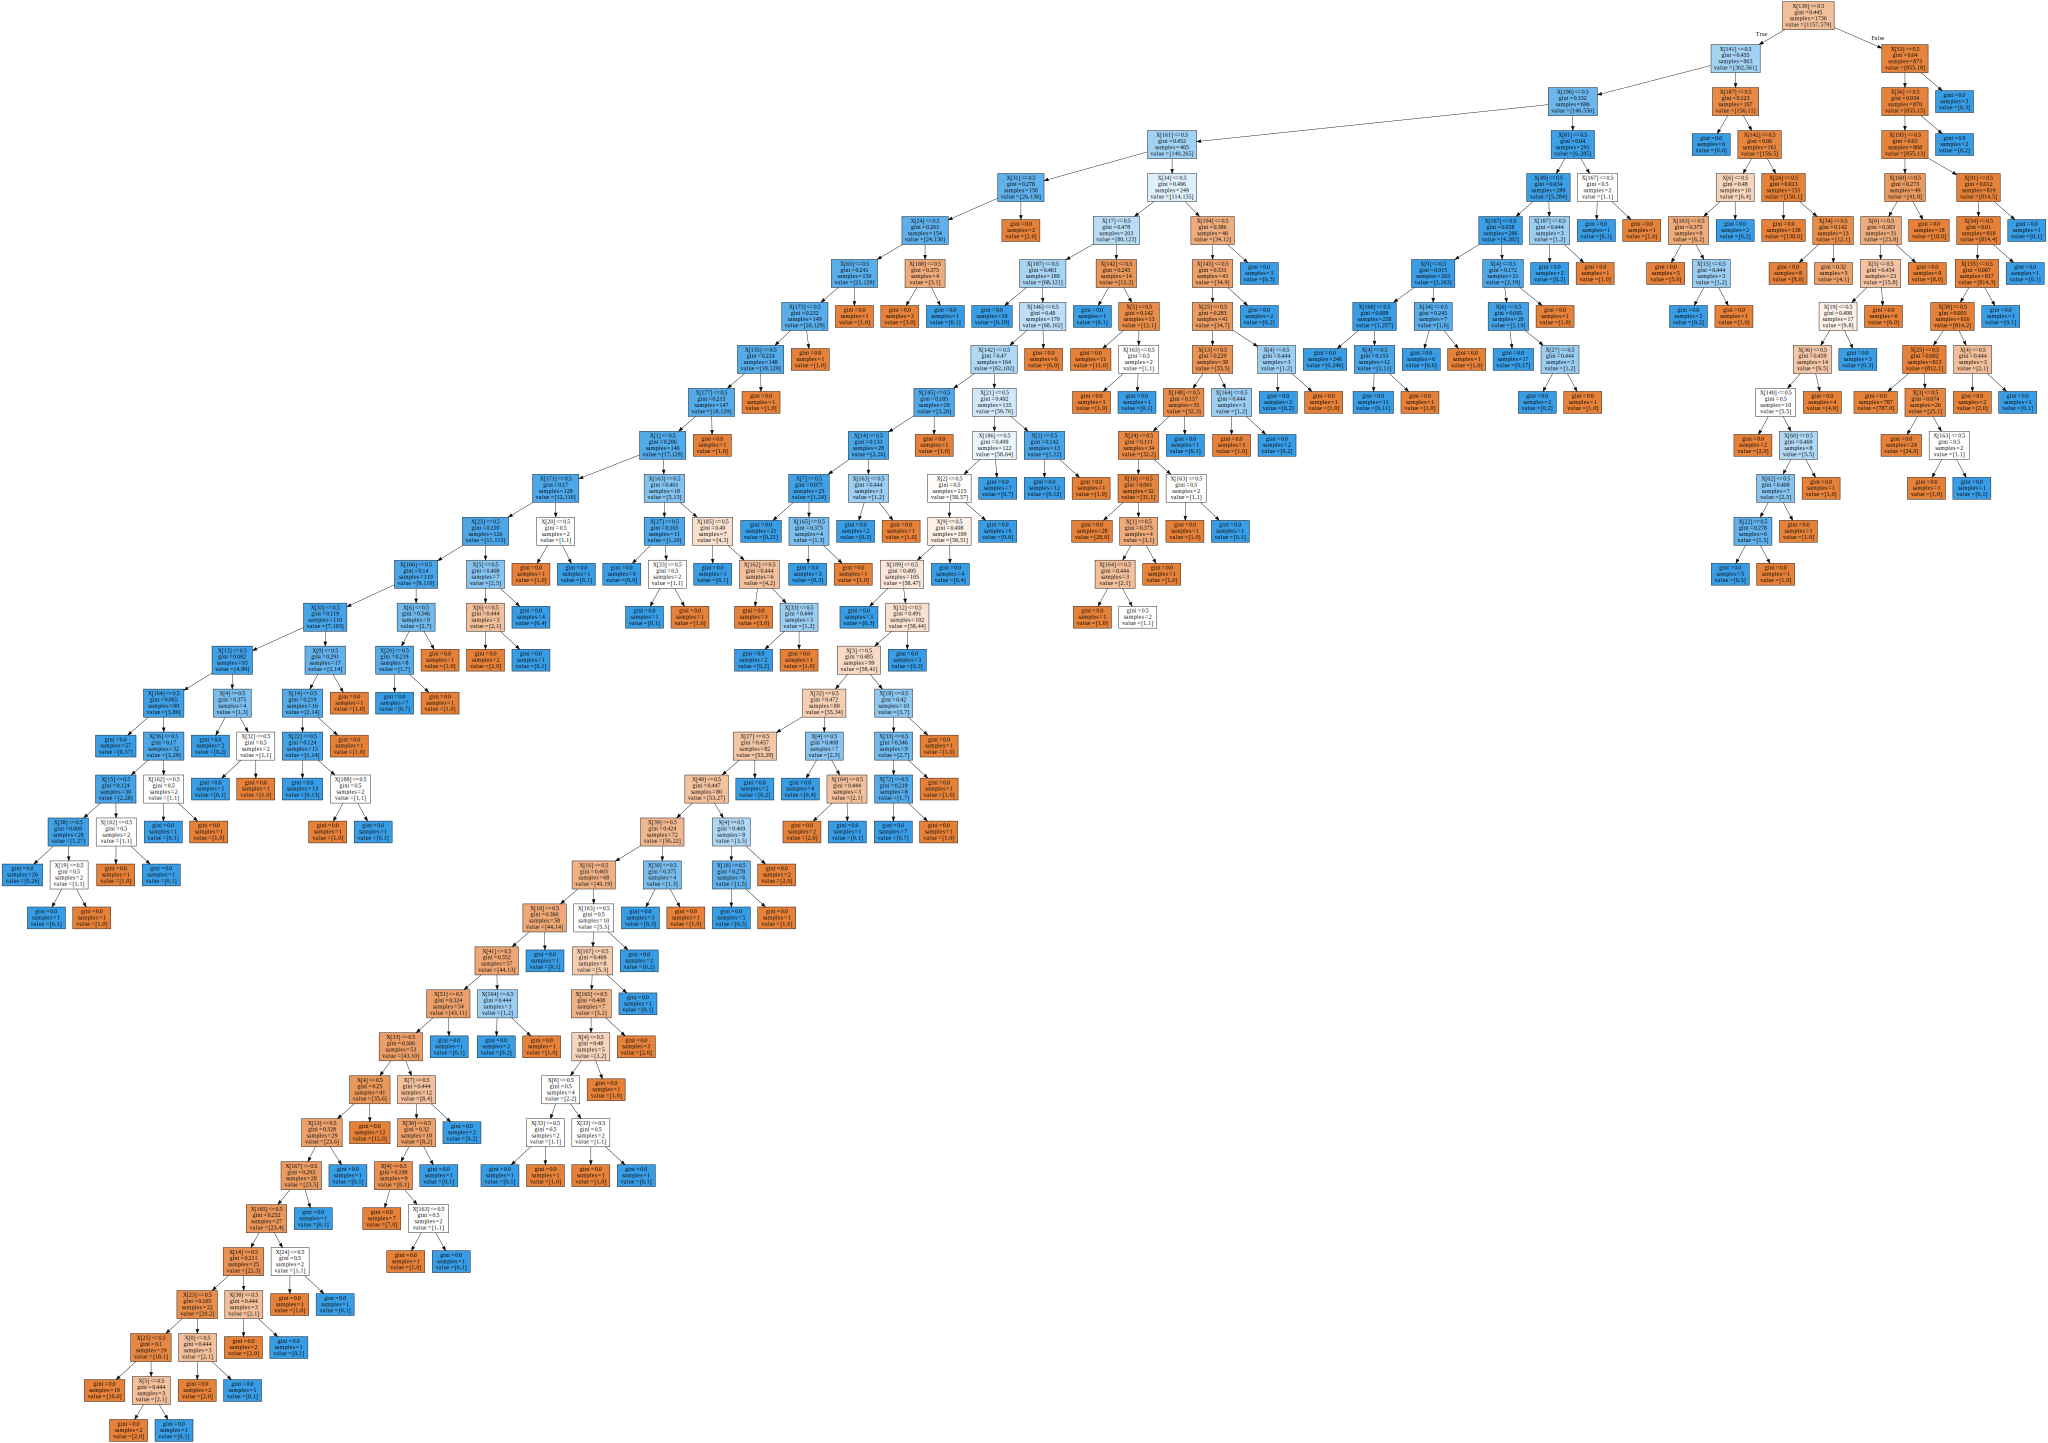

In [152]:
dot_data = export_graphviz(clf, out_file=None, filled=True)

# Image of "Original_decision_tree.png" included in the submission folder

graph = graphviz.Source(dot_data, format="png") 
graph

In [153]:
graph.render("decision_tree_graphivz_onehot")


'decision_tree_graphivz_onehot.png'

### (e)

The default selection criteria is used by default when learning the tree model is: "Gini Index"

### (f)

In [169]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

print("mean accuracy on training sets: %.2f" %clf.score(X_train, y_train))
print("mean accuracy on testing sets: %.2f" %clf.score(X_test, y_test))

tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel()

print("Sensitivity for the test set: %.2f" %(tp/(tp + fn)))
print("specificity for the test set: %.2f" %(tn/(tn + fp)))
print("AUC for the test set: %.2f" %roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]))

mean accuracy on training sets: 1.00
mean accuracy on testing sets: 0.89
Sensitivity for the test set: 0.79
specificity for the test set: 0.93
AUC for the test set: 0.86


### (g)

(0.9149425287356322, 14)

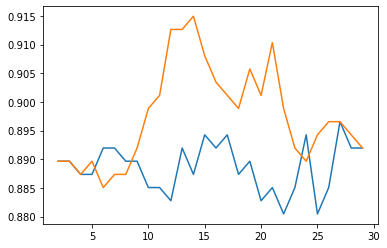

In [189]:
depth = []
gini_score = []
entropy_score = []

for i in range(2, 30):
    depth.append(i)
    
    clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=i)
    clf_gini.fit(X_train, y_train)
    gini_score.append(clf_gini.score(X_test, y_test))
    
    clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    clf_entropy.fit(X_train, y_train)
    entropy_score.append(clf_entropy.score(X_test, y_test))
    
    
plt.plot(depth, gini_score)
plt.plot(depth, entropy_score)

dic1 = zip(entropy_score, depth)
max(list(dic1))

In [191]:
clf_entropy_pruned = DecisionTreeClassifier(criterion='entropy', max_depth=14)
clf_entropy_pruned.fit(X_train, y_train)
clf_entropy_pruned.score(X_test, y_test)

0.9149425287356322

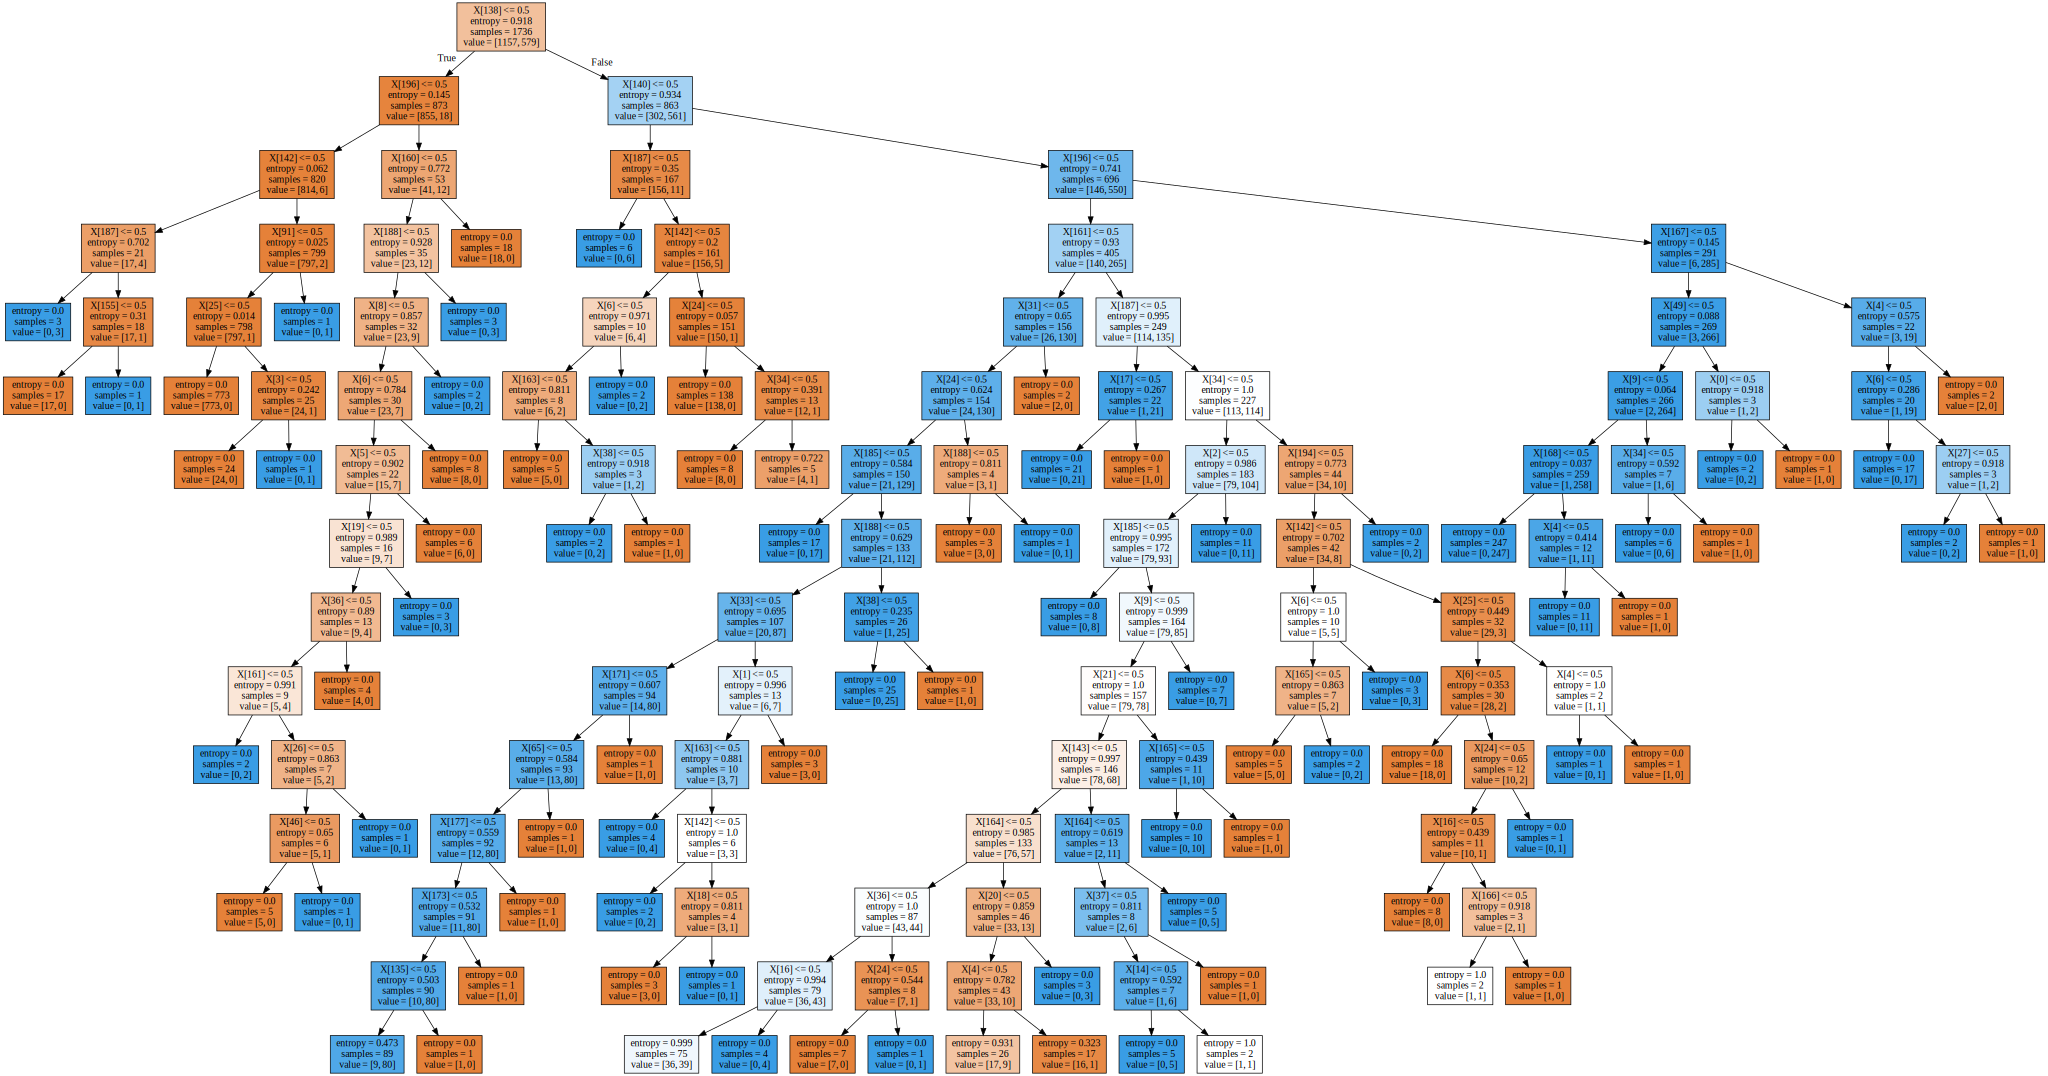

In [192]:
dot_data_pruned = export_graphviz(clf_entropy_pruned, out_file=None, filled=True)

graph_pruned = graphviz.Source(dot_data_pruned, format="png") 
graph_pruned

In [194]:
graph_pruned.render("Pruned_decision_tree")

# Image of "Pruned_decision_tree.png" included in the submission folder

'Pruned_decision_tree.png'

In [195]:
print("mean accuracy on testing sets: %.2f" %clf_entropy_pruned.score(X_test, y_test))
y_pred = clf_entropy_pruned.predict(X_test)
tn_pruned, fp_pruned, fn_pruned, tp_pruned = confusion_matrix(y_test, y_pred).ravel()

print("Sensitivity for the test set: %.2f" %(tp_pruned/(tp_pruned + fn_pruned)))
print("specificity for the test set: %.2f" %(tn_pruned/(tn_pruned + fp_pruned)))
print("AUC for the test set: %.2f" %roc_auc_score(y_test, clf_entropy_pruned.predict_proba(X_test)[:,1]))

mean accuracy on testing sets: 0.91
Sensitivity for the test set: 0.90
specificity for the test set: 0.92
AUC for the test set: 0.93


### 7. Spam, Spam, Spam

In [340]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

cat_columns = ['day of week', 'box',
       'local', 'name', 'credit', 'sucker',
       'porn', 'chain', 'username', 'large text']


cat_to_num = pd.get_dummies(spam_params, columns=cat_columns)

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(cat_to_num)

skf = StratifiedKFold(n_splits=10)

cat_to_num

,time of day,size.kb,digits,special,day of week_Fri,day of week_Mon,day of week_Sat,day of week_Sun,day of week_Thu,day of week_Tue,...,sucker_no,sucker_yes,porn_no,porn_yes,chain_no,chain_yes,username_no,username_yes,large text_no,large text_yes
0,0,7,0,1,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
1,0,2,0,5,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
2,14,3,0,2,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,1,0
3,3,3,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
4,3,4,0,2,0,0,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,10,5,0,1,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
2167,15,192,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
2168,15,85,0,0,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,1,0
2169,13,4,0,0,0,0,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0


### KNN

In [285]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score

KNN_acc = []
KNN_spec = []
KNN_sens = []
KNN_auc_roc = []

for i in [3, 7, 11, 15]:
    temp_acc = []
    temp_spec = []
    temp_sens = []
    temp_auc_roc = []
    for train_index, test_index in skf.split(spam_params, target):
        x_train_fold, x_test_fold = X_scaled[train_index], X_scaled[test_index]
        y_train_fold, y_test_fold = target[train_index], target[test_index] 
        
        neigh = KNeighborsClassifier(n_neighbors=i)
        neigh.fit(x_train_fold, y_train_fold)
        
        y_pred = neigh.predict(x_test_fold)
        acc = round(accuracy_score(y_test_fold, y_pred), 4)*100
        temp_acc.append(acc)
        
        tn, fp, fn, tp = confusion_matrix(y_test_fold, y_pred).ravel()
        temp_spec.append(round(tn/(tn + fp), 4)*100)
        temp_sens.append(round(tp/(tp + fn), 4)*100)
        temp_auc_roc.append(round(roc_auc_score(y_test_fold, neigh.predict_proba(x_test_fold)[:,1]), 4)*100)

    KNN_acc.append(temp_acc)
    KNN_spec.append(temp_spec)    
    KNN_sens.append(temp_sens)    
    KNN_auc_roc.append(temp_auc_roc)    
        

KNN_acc_mean = [round(np.mean(x), 3) for x in KNN_acc]


### Decision Trees

In [287]:
clf_acc_basic = []
clf_acc_pruned = []

clf_spec_basic = []
clf_spec_pruned = []

clf_sens_basic = []
clf_sens_pruned = []

clf_auc_roc_basic = []
clf_auc_roc_pruned = []

for train_index, test_index in skf.split(spam_params, target):
        
        x_train_fold, x_test_fold = X_scaled[train_index], X_scaled[test_index]
        y_train_fold, y_test_fold = target[train_index], target[test_index] 
        
        #Unpruned tree
        clf_basic = DecisionTreeClassifier()
        clf_basic.fit(x_train_fold, y_train_fold)
        
        #Report parameters for unpruned tree
        y_pred_basic = clf_basic.predict(x_test_fold)
        clf_acc_basic.append(round(accuracy_score(y_test_fold, y_pred_basic), 4)*100)
        
        tn, fp, fn, tp = confusion_matrix(y_test_fold, y_pred_basic).ravel()
        clf_spec_basic.append(round(tn/(tn + fp), 4)*100)
        clf_sens_basic.append(round(tp/(tp + fn), 4)*100)
        clf_auc_roc_basic.append(round(roc_auc_score(y_test_fold, clf_basic.predict_proba(x_test_fold)[:,1]), 4)*100)

        
        #Pruned tree
        clf_pruned = DecisionTreeClassifier(criterion='entropy', max_depth=12)
        clf_pruned.fit(x_train_fold, y_train_fold)
        
        #Report parameters for pruned tree 
        y_pred_pruned = clf_pruned.predict(x_test_fold)
        clf_acc_pruned.append(round(accuracy_score(y_test_fold, y_pred_pruned), 4)*100)
        
        tn, fp, fn, tp = confusion_matrix(y_test_fold, y_pred_pruned).ravel()
        tn, fp, fn, tp = confusion_matrix(y_test_fold, y_pred_basic).ravel()
        clf_spec_pruned.append(round(tn/(tn + fp), 4)*100)
        clf_sens_pruned.append(round(tp/(tp + fn), 4)*100)
        clf_auc_roc_pruned.append(round(roc_auc_score(y_test_fold, clf_pruned.predict_proba(x_test_fold)[:,1]), 4)*100)
        
        


### Naive Bayes

In [288]:
from sklearn.naive_bayes import GaussianNB

Gnb_acc = []
Gnb_spec = []
Gnb_sens = []
Gnb_auc_roc = []

for train_index, test_index in skf.split(spam_params, target):
        x_train_fold, x_test_fold = X_scaled[train_index], X_scaled[test_index]
        y_train_fold, y_test_fold = target[train_index], target[test_index] 
        
        clf_gnb = GaussianNB()
        clf_gnb.fit(x_train_fold, y_train_fold)
        
        y_pred_gnb = clf_gnb.predict(x_test_fold)
        acc = round(accuracy_score(y_test_fold, y_pred_gnb), 4)*100
        Gnb_acc.append(acc)
        
        tn, fp, fn, tp = confusion_matrix(y_test_fold, y_pred_gnb).ravel()
        Gnb_spec.append(round(tn/(tn + fp), 4)*100)
        Gnb_sens.append(round(tp/(tp + fn), 4)*100)
        Gnb_auc_roc.append(round(roc_auc_score(y_test_fold, clf_gnb.predict_proba(x_test_fold)[:,1]), 4)*100)

In [289]:
Gnb_auc_roc

[85.53,
 98.56,
 100.0,
 95.49,
 98.3,
 93.65,
 92.38,
 96.73,
 96.71,
 94.32000000000001]

In [335]:
acc_data = {'KNN3': KNN_acc[0], 'KNN7': KNN_acc[1], 'KNN11': KNN_acc[2], 
            'KNN13': KNN_acc[3], 'Decision Tree Basic': clf_acc_basic, 
            'Decision Tree Pruned': clf_acc_pruned, 'Naive Bayes': Gnb_acc}


acc_df = pd.DataFrame(acc_data)
mean_data = np.array(acc_df.mean().tolist())

acc_df.loc['mean'] = mean_data

acc_df

,KNN3,KNN7,KNN11,KNN13,Decision Tree Basic,Decision Tree Pruned,Naive Bayes
0,72.940,74.770,74.770,70.180,71.100,71.560,81.650
1,94.470,93.090,92.630,92.170,88.020,89.400,91.710
2,96.310,96.770,97.700,97.700,96.770,96.770,99.540
3,94.010,93.550,94.930,93.550,94.010,95.390,89.860
4,94.930,94.010,94.930,94.470,94.930,94.930,95.390
5,88.940,90.780,91.710,89.400,88.020,87.100,85.250
6,84.790,86.180,85.710,85.250,84.330,86.640,87.560
7,95.390,95.390,95.390,94.930,90.780,90.320,92.170
8,90.320,93.550,93.550,92.170,85.710,90.320,92.170
9,88.020,86.180,85.250,84.790,82.950,85.250,83.410


In [336]:
spec_data = {'KNN3': KNN_spec[0], 'KNN7': KNN_spec[1], 'KNN11': KNN_spec[2], 
            'KNN13': KNN_spec[3], 'Decision Tree Basic': clf_spec_basic, 
            'Decision Tree Pruned': clf_spec_pruned, 'Naive Bayes': Gnb_spec}


spec_df = pd.DataFrame(spec_data)
mean_data = np.array(spec_df.mean().tolist())

spec_df.loc['mean'] = mean_data

spec_df

,KNN3,KNN7,KNN11,KNN13,Decision Tree Basic,Decision Tree Pruned,Naive Bayes
0,68.710,71.430,70.750,65.990,72.790,72.790,95.920
1,97.260,97.950,97.950,96.580,91.100,91.100,99.320
2,95.210,95.890,96.580,96.580,97.260,97.260,100.000
3,97.260,97.260,97.950,97.260,98.630,98.630,89.730
4,93.840,93.150,94.520,93.840,95.210,95.210,95.210
5,93.150,95.210,95.890,94.520,95.890,95.890,89.730
6,90.410,90.410,89.040,89.040,90.410,90.410,91.780
7,96.580,96.580,96.580,96.580,93.150,93.150,95.890
8,93.840,96.580,96.580,96.580,91.100,91.100,94.520
9,96.580,95.210,94.520,95.890,91.100,91.100,93.150


In [337]:
sens_data = {'KNN3': KNN_sens[0], 'KNN7': KNN_sens[1], 'KNN11': KNN_sens[2], 
            'KNN13': KNN_sens[3], 'Decision Tree Basic': clf_sens_basic, 
            'Decision Tree Pruned': clf_sens_pruned, 'Naive Bayes': Gnb_sens}


sens_df = pd.DataFrame(sens_data)
mean_data = np.array(sens_df.mean().tolist())

sens_df.loc['mean'] = mean_data

sens_df

,KNN3,KNN7,KNN11,KNN13,Decision Tree Basic,Decision Tree Pruned,Naive Bayes
0,81.690,81.690,83.100,78.870,67.610,67.610,52.110
1,88.730,83.100,81.690,83.100,81.690,81.690,76.060
2,98.590,98.590,100.000,100.000,95.770,95.770,98.590
3,87.320,85.920,88.730,85.920,84.510,84.510,90.140
4,97.180,95.770,95.770,95.770,94.370,94.370,95.770
5,80.280,81.690,83.100,78.870,71.830,71.830,76.060
6,73.240,77.460,78.870,77.460,71.830,71.830,78.870
7,92.960,92.960,92.960,91.550,85.920,85.920,84.510
8,83.100,87.320,87.320,83.100,74.650,74.650,87.320
9,70.420,67.610,66.200,61.970,66.200,66.200,63.380


In [338]:
auc_roc_data = {'KNN3': KNN_auc_roc[0], 'KNN7': KNN_auc_roc[1], 'KNN11': KNN_auc_roc[2], 
            'KNN13': KNN_auc_roc[3], 'Decision Tree Basic': clf_auc_roc_basic, 
            'Decision Tree Pruned': clf_auc_roc_pruned, 'Naive Bayes': Gnb_auc_roc}


auc_roc_df = pd.DataFrame(auc_roc_data)
mean_data = np.array(auc_roc_df.mean().tolist())

auc_roc_df.loc['mean'] = mean_data

auc_roc_df

,KNN3,KNN7,KNN11,KNN13,Decision Tree Basic,Decision Tree Pruned,Naive Bayes
0,78.770,84.46,86.760,85.480,70.200,74.910,85.530
1,96.560,98.22,98.060,97.930,86.390,92.830,98.560
2,98.620,99.25,99.780,99.810,96.520,99.200,100.000
3,96.930,97.67,97.810,97.820,91.570,96.910,95.490
4,97.580,98.16,98.280,98.910,94.770,96.170,98.300
5,92.760,96.70,97.080,96.820,83.760,89.200,93.650
6,89.000,91.19,91.930,92.830,81.120,85.370,92.380
7,96.040,96.03,95.620,96.380,89.440,93.280,96.730
8,93.440,96.10,96.600,97.060,82.790,92.820,96.710
9,86.780,93.42,93.860,94.600,79.810,91.620,94.320
